# Estatística descritiva univariada

### Transformação de variáveis quantitativas em qualitativas



Conforme descrito no início deste módulo, as variáveis quantitativas contínuas são aquelas cujos possíveis valores pertencem a um intervalo de números reais. Desta forma, não faz sentido calcular a frequência para cada valor possível, já que eles raramente se repetem. 

Neste contexto, faz sentido agrupar os dados em classes ou faixas. O intervalo a ser definido entre as classes é arbitrário. Porém, se o número de classes for muito pequeno, informações são perdidas; enquanto que, se o número de classes for muito grande, o resumo das informações fica prejudicado. 

O intervalo entre as classes não precisaria ser constante, mas por uma questão de simplicidade e facilidade de interpretação, é costume adotar um intervalo constante.


Para ilustrar, usaremos a seguinte base de dados, com as notas finais de 30 alunos em uma disciplina de estatística de uma universidade.

In [17]:
import pandas as pd

DADOS = "./dados/grades.csv"

df_notas = pd.read_csv(DADOS)

df_notas.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6


In [18]:
df_notas.tail()

,grades
25,5.0
26,6.6
27,7.1
28,5.3
29,4.7


In [19]:
df_notas.describe()

,grades
count,30.000000
mean,5.686667
std,1.318498
min,3.500000
25%,4.700000
50%,5.500000
75%,6.575000
max,8.800000


In [20]:
# Problema com valores continuos

df_notas['grades'].value_counts()

grades
5.0    4
5.5    2
6.0    2
7.2    2
4.7    2
3.9    1
4.2    1
8.0    1
6.3    1
4.6    1
6.5    1
5.7    1
4.4    1
6.4    1
4.5    1
6.8    1
3.5    1
7.4    1
8.8    1
3.8    1
6.6    1
7.1    1
5.3    1
Name: count, dtype: int64

In [21]:
df_notas['grades'].value_counts(bins=10)

(4.56, 5.09]     7
(6.15, 6.68]     4
(6.68, 7.21]     4
(3.494, 4.03]    3
(4.03, 4.56]     3
(5.09, 5.62]     3
(5.62, 6.15]     3
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

In [22]:
df_notas['grades'].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

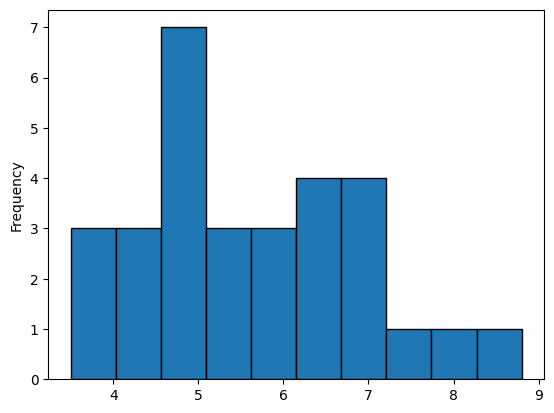

In [23]:
df_notas['grades'].plot.hist(bins=10, edgecolor='black')

In [24]:
df_notas['grades'].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

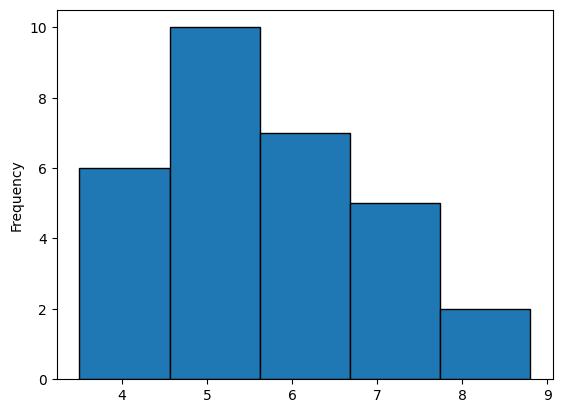

In [25]:
df_notas['grades'].plot.hist(bins=5, edgecolor='black')

Mas qual será a melhor divisão de classes para representar os dados de forma clara e objetiva? A escolha do número de classes e dos intervalos de classe é uma etapa crucial na construção de tabelas de distribuição de frequências e na representação gráfica dos dados.

A regra de Sturges é uma regra empírica utilizada para determinar o número de classes em uma distribuição de frequências. A regra é dada pela fórmula:

$$
k = 1 + \log_{2}(n)
$$

onde *k* é o número de classes e *n* é o número de observações.

In [26]:
df_notas.shape

(30, 1)

In [27]:
import numpy as np

#quantidade de barras

k = 1 +np.log2(df_notas.shape[0])

k

np.float64(5.906890595608519)

In [28]:

k = np.ceil(k)

k

np.float64(6.0)

In [29]:
# intervalos

amplitude = (df_notas['grades'].max() - df_notas['grades'].min())/k

amplitude

np.float64(0.8833333333333334)

In [30]:
df_notas['grades'].value_counts(bins=int(k)).sort_index()

(3.494, 4.383]    4
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

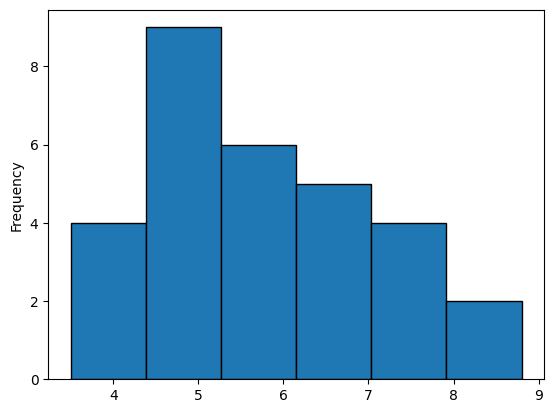

In [31]:
df_notas['grades'].plot.hist(bins=int(k),edgecolor='black')

In [32]:
bins = np.histogram_bin_edges(df_notas['grades'],bins='sturges')

bins

array([3.5       , 4.38333333, 5.26666667, 6.15      , 7.03333333,
       7.91666667, 8.8       ])

https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html

In [33]:
tamanho_intervalo = bins[1:] - bins[:-1]

tamanho_intervalo

array([0.88333333, 0.88333333, 0.88333333, 0.88333333, 0.88333333,
       0.88333333])

In [35]:
pd.cut(df_notas['grades'],bins=bins).value_counts().sort_index()

grades
(3.5, 4.383]      3
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

In [36]:
pd.cut(df_notas['grades'],bins=bins).value_counts().sort_index().sum()

np.int64(29)

In [ ]:
pd.cut(df_notas['grades'],bins=bins,include_lowest=True).value_counts().sort_index() #incluir o primeiro numero no range

grades
(3.499, 4.383]    4
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

In [40]:
tamanho_intervalo_inteiro = np.zeros(len(bins))

tamanho_intervalo_inteiro

array([0., 0., 0., 0., 0., 0., 0.])

In [41]:
tamanho_intervalo_inteiro[1:] = np.ceil(tamanho_intervalo)

tamanho_intervalo_inteiro

array([0., 1., 1., 1., 1., 1., 1.])

In [42]:
np.cumsum(tamanho_intervalo_inteiro)

array([0., 1., 2., 3., 4., 5., 6.])

In [44]:
bins_arredondados =bins[0]+np.cumsum(tamanho_intervalo_inteiro)

bins_arredondados

array([3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [45]:
pd.cut(df_notas['grades'],bins=bins_arredondados,include_lowest=True).value_counts().sort_index()

grades
(3.499, 4.5]     6
(4.5, 5.5]      10
(5.5, 6.5]       6
(6.5, 7.5]       6
(7.5, 8.5]       1
(8.5, 9.5]       1
Name: count, dtype: int64

In [47]:
pd.cut(df_notas['grades'],bins=bins_arredondados ,right= False).value_counts().sort_index()

grades
[3.5, 4.5)    5
[4.5, 5.5)    9
[5.5, 6.5)    7
[6.5, 7.5)    7
[7.5, 8.5)    1
[8.5, 9.5)    1
Name: count, dtype: int64

In [49]:
df_notas_intervalos=pd.cut(df_notas['grades'],bins=bins,include_lowest=True).value_counts().sort_index().to_frame()

df_notas_intervalos

,count
grades,
"(3.499, 4.383]",4
"(4.383, 5.267]",9
"(5.267, 6.15]",6
"(6.15, 7.033]",5
"(7.033, 7.917]",4
"(7.917, 8.8]",2
